# Quantum Circuits

Puedo realizar circuitos cuánticos con pyhton, para fines prácticos importaremso todo de la librería, pero no hará falta a media que conozcamos las funciones y módulos.



In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import seaborn as sns

In [2]:
sns.set_theme()

##  Funciones

QuantumCirctuit(a,b):
    - Me permite crear un circuito
    - a: Registra qbits
    - b: Registra bits clásicos.
   

In [3]:
circuit = QuantumCircuit(2,2)

Podemos registrar qbits y bits clásicos por separado:

In [4]:
#quantum_register = QuantumRegister(2) # Registramos dos qbits
#clasical_register = ClassicalRegister(2) # Registramos dos bits clásicos

In [5]:
# Function for superposition and entaglement base:
def simple_circuit_creator():
    circuit =QuantumCircuit(2,2)
    circuit.h(0)# add Hadamard to q0
    circuit.cx(0,1)# add CNOT, control qubit 0 y target 1, verifica que si el qbit de control está en estado 1, de ser así aplica el NOT gat sobre el 1
    return circuit.draw(output='mpl')
    

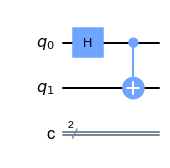

In [6]:
simple_circuit_creator() # Superposition-Entaglement

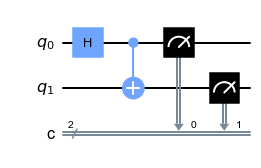

In [7]:
# El objeto se almacena
circuit =QuantumCircuit(2,2)
circuit.h(0)# add Hadamard to q0
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [8]:
# Para ejecutarlo y simularlo en un computador real:
simulator = Aer.get_backend('qasm_simulator')


In [9]:
result = execute(circuit,backend=simulator).result()
result

Result(backend_name='qasm_simulator', backend_version='0.10.2', qobj_id='46ed4d65-2b0f-449b-a807-9ecfa5542ab0', job_id='f0ed9273-8c41-4577-af67-0882787855f3', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 530, '0x0': 494}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-2', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=930212994, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 4, 'fusion': {'enabled': False}}, time_taken=0.0055446)], date=2022-04-15T06:11:50.822010, status=COMPLETED, status=QobjHeader(backe

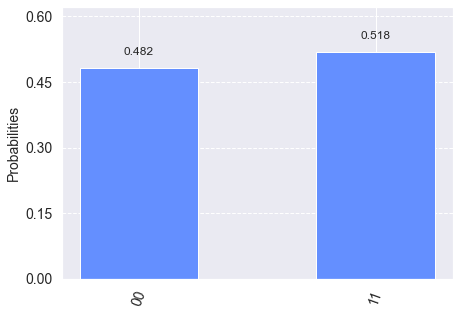

In [10]:
plot_histogram(result.get_counts(circuit))

In [12]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Executing on Porviders

Puedo ejecu

In [15]:
provider = IBMQ.get_provider("ibm-q")
quatum_backend = provider.get_backend('ibmq_lima')

In [16]:
import qiskit.tools.jupyter#monitor of jobs pendings
%qiskit_job_watcher

job = execute(circuit,backend = quatum_backend)


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [17]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


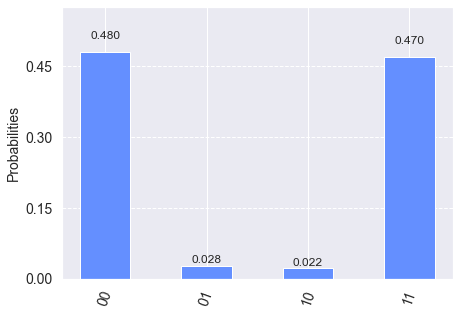

In [18]:
quantum_result= job.result()
plot_histogram(quantum_result.get_counts(circuit))

Podemos ignorar los valores con menor probabilidad, muchas veces es ruido.

NOTA:

¿Ruido?, No pareciese ruido, cuando las fracciones que derivan de 01 y 10 son tan parecidas. Pareciera que una fracción más grande, me da mejores probabilidades de que 0 o 1 aparezca, en este caso

In [20]:
%qiskit_disable_job_watcher # Detener el job watcher para disminuir en memoria